# Prediction using Unsupervised ML
## GRIP Internship Program
--------
### Task: 1 
### Assigned by: The Sparks Foundation
### Author: SUNIL KUMAR SINGH

### Predict and Visualising the Optimum Number of  Clusters.
k-means consists of defining k clusters such that total within-cluster variation (or error) is minimum. A cluster center is the representative of its cluster. The squared distance between each point and its cluster center is the required variation. The aim of k-means clustering is to find these k clusters and their centers while reducing the total error.

### 1. Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### 2. Importing data.

In [2]:
iris = pd.read_csv('D:\_PROJECT\GRIP\Task 2\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 3. Find the optimum number of clusters
From the given ‘Iris’ dataset, we predict the optimum number of  clusters using 'elbow method'.

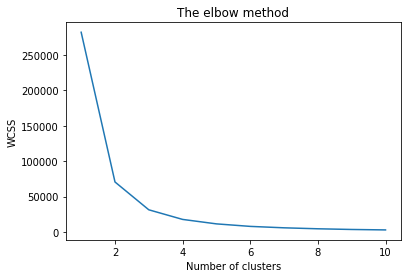

In [4]:
x = iris.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **'3'**. Hence, it is optimal.

### 4. Applying K-Means and Visualising the Clusters

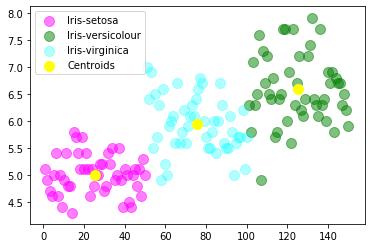

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++', 
                max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[pred_y == 0, 0], x[pred_y == 0, 1], 
            s = 100, c = 'magenta', alpha = 0.5, label = 'Iris-setosa')
plt.scatter(x[pred_y == 1, 0], x[pred_y == 1, 1], 
            s = 100, c = 'green', alpha = 0.5, label = 'Iris-versicolour')
plt.scatter(x[pred_y == 2, 0], x[pred_y == 2, 1],
            s = 100, c = 'cyan', alpha = 0.3, label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', marker = "o", label = 'Centroids')

plt.legend()

### Completed.
Thank you! :)